# Linear Regression



Lab Assignment 6 - Linear Regression

Demonstrate linear regression for the following datasets. (CSV file are attached)

<a href = 'https://github.com/nijatullahmansoor/IBM-Data-Science-Professional-Certificate/blob/master/Machine%20learning%20With%20python/MSC/labs/companies.csv'>1. Insurance dataset</a>

<a href = 'https://github.com/nijatullahmansoor/IBM-Data-Science-Professional-Certificate/blob/master/Machine%20learning%20With%20python/MSC/labs/insurance%20dataset%20for%20regression.xlsx?raw=true'>2. Companies dataset</a>

Import Nedded pakages.

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Dwonload the dataset.

In [56]:
insurance_df = pd.read_excel('insurance dataset for regression.xlsx',header=1)

In [57]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Exploration

Let's first have a descriptive exploration on our data.

In [58]:
# sumarise the dataset.
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [64]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


from the above result we can see that we have mixed data what i mean is that it nominal and numeric data. We know that MLA wont' work on nominal data we need to convert this to numeric data.

In [66]:
insurance_category_columns = insurance_df.select_dtypes(['object']).columns
insurance_category_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [69]:
insurance_df[insurance_category_columns] = insurance_df[insurance_category_columns].astype('category')

In [75]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [76]:
insurance_df[insurance_category_columns] = insurance_df[insurance_category_columns].apply(lambda x:x.cat.codes)

In [77]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 45.9 KB


Now we are ready to apply LRM.

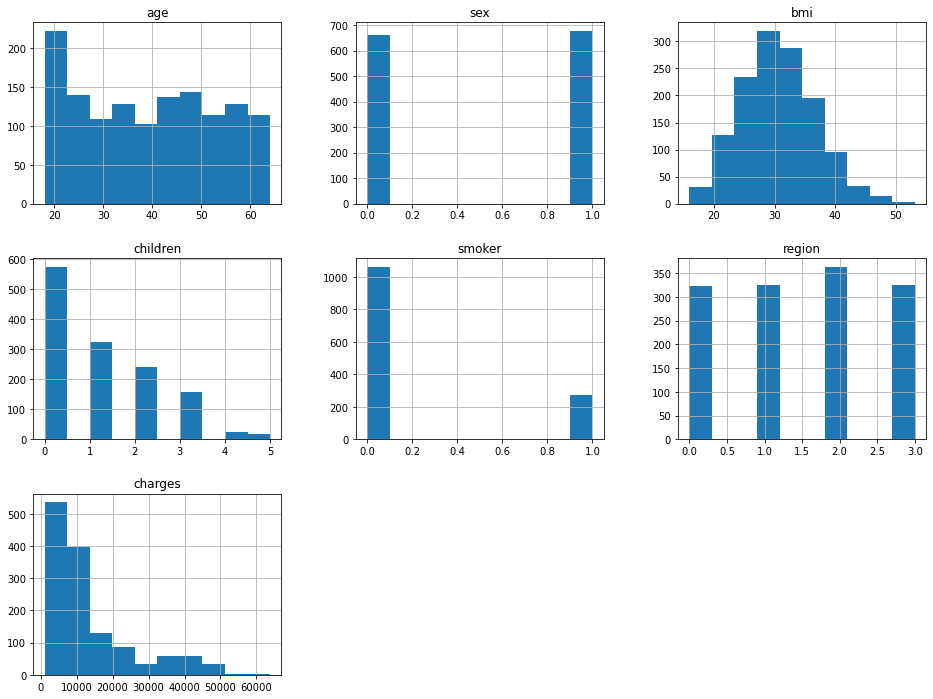

In [80]:
insurance_df.hist(figsize=(16,12))
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

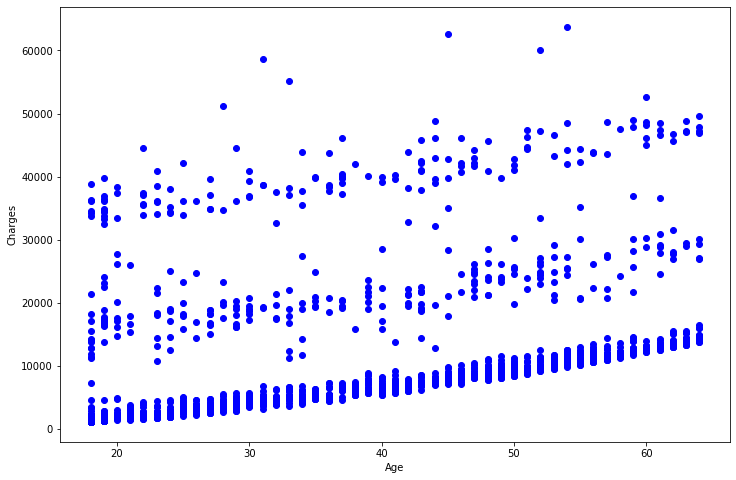

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(insurance_df.age, insurance_df.charges,  color='blue')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

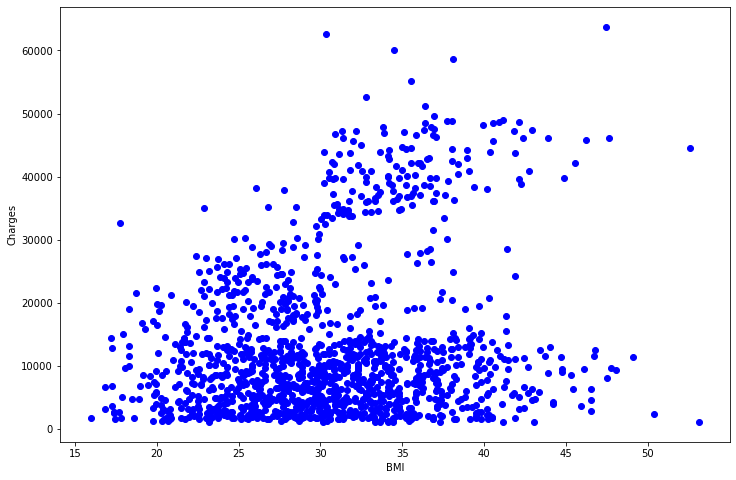

In [87]:
plt.figure(figsize=(12,8))
plt.scatter(insurance_df.bmi, insurance_df.charges,  color='blue')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

C:\Users\nijat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


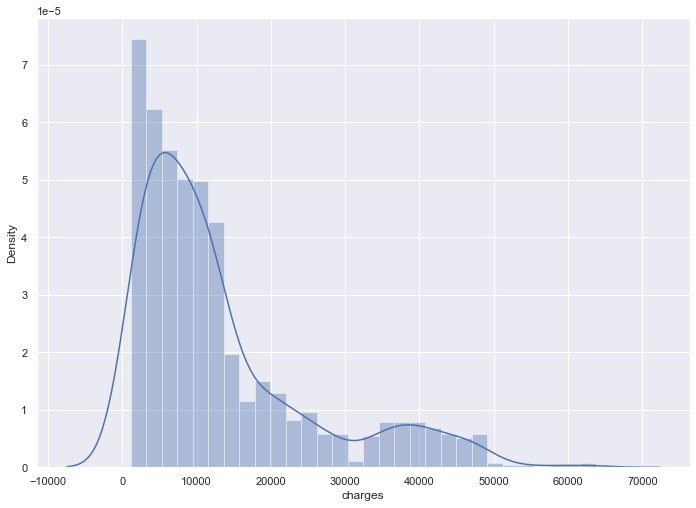

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(insurance_df['charges'], bins=30)
plt.show()

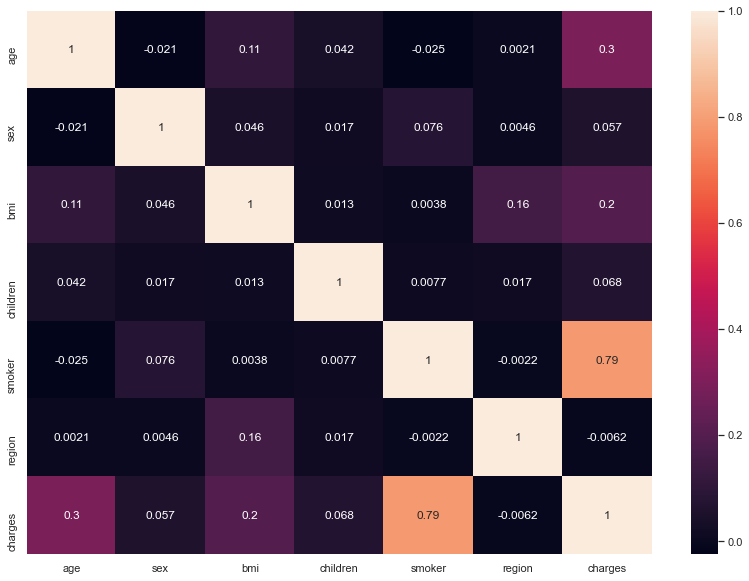

In [91]:
plt.figure(figsize=(14,10))
correlation_matrix = insurance_df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

From the plot we can see that there is a very strong co-relation btween the Charges and smoker. and very week co-relation between the charges and region.

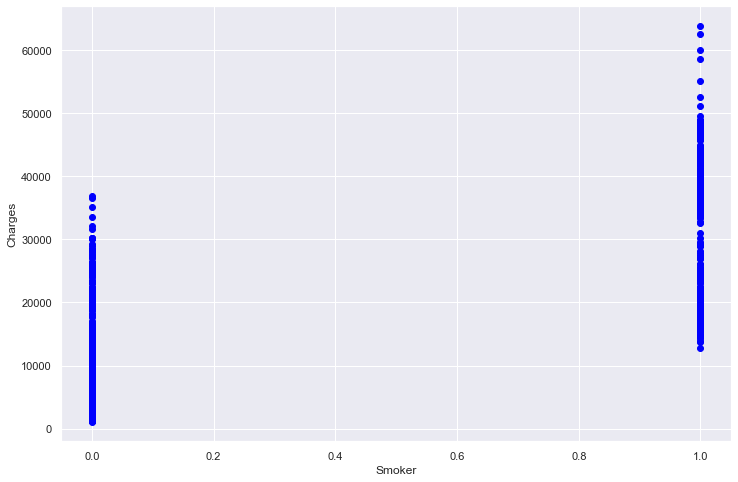

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(insurance_df.smoker, insurance_df.charges,  color='blue')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:


In [118]:
msk = np.random.rand(len(insurance_df)) < 0.8
train1 = insurance_df[msk]
test1 = insurance_df[~msk]

In [119]:
len(train1)

1074

In [120]:
len(test1)

264

In [121]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [122]:
X = insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = insurance_df['charges']

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

In [125]:
X_test.head()

,0,1,2,3,4,5
0,-1.353043,-1.007491,-0.065097,-0.811202,-0.508150,-1.333702
1,-0.936483,0.992565,-0.112621,-0.811202,1.967925,-1.333702
2,1.146317,-1.007491,-0.476967,-0.020649,-0.508150,-0.444567
3,-1.075336,-1.007491,0.916220,-0.811202,-0.508150,1.333702
4,-0.172789,-1.007491,0.617740,-0.020649,-0.508150,0.444567


In [127]:
X_train.head()

,0,1,2,3,4,5
0,-0.836008,0.988847,1.045303,-0.094327,-0.507291,1.346633
1,-1.123361,-1.011279,-1.058530,-0.935409,-0.507291,-0.472682
2,-1.482552,0.988847,-0.018460,-0.935409,-0.507291,-0.472682
3,-1.195199,-1.011279,-1.058530,0.746755,-0.507291,-1.382339
4,-1.554390,-1.011279,-0.918819,-0.935409,-0.507291,-1.382339


In [139]:
X_train.columns= ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
X_test.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Y_test.columns=['charges']
Y_test.columns=['charges']

In [129]:
X_train.head()

,age,sex,bmi,children,smoker,region
0,-0.836008,0.988847,1.045303,-0.094327,-0.507291,1.346633
1,-1.123361,-1.011279,-1.058530,-0.935409,-0.507291,-0.472682
2,-1.482552,0.988847,-0.018460,-0.935409,-0.507291,-0.472682
3,-1.195199,-1.011279,-1.058530,0.746755,-0.507291,-1.382339
4,-1.554390,-1.011279,-0.918819,-0.935409,-0.507291,-1.382339


In [142]:
Y_test = pd.DataFrame(Y_test)

In [143]:
Y_train = pd.DataFrame(Y_train)

In [144]:
Y_test.head()

,charges
471,2203.47185
1250,18648.42170
1257,11305.93455
139,2166.73200
919,5245.22690


#### Modeling

Using sklearn package to model data.

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [149]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6108.101624462875
R2 score is 0.7427518003973261


The model performance for testing set
--------------------------------------
RMSE is 5862.108578616321
R2 score is 0.7736043964932899


from the above result we can say that our model doesn't have any overfitting and underfitting. and our model a good job.

## Let's do same for the second dataset.

In [150]:
# Read the data
companies_df = pd.read_csv('companies.csv')
companies_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Exploration

Let's first have a descriptive exploration on our data.

In [151]:
companies_df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [152]:
companies_df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Let's select feature to explore more this.


In [153]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


from the above result we can see that we have mixed data what i mean is that it nominal and numeric data. We know that MLA wont' work on nominal data we need to convert this to numeric data.

In [154]:
company_category_columns = companies_df.select_dtypes(['object']).columns

In [155]:
company_category_columns

Index(['State'], dtype='object')

In [156]:
companies_df[company_category_columns] = companies_df[company_category_columns].astype('category')

In [157]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [158]:
companies_df[company_category_columns] = companies_df[company_category_columns].apply(lambda x:x.cat.codes)

In [159]:
companies_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Now we are ready to apply LRM.

Let's  plot some of these features:

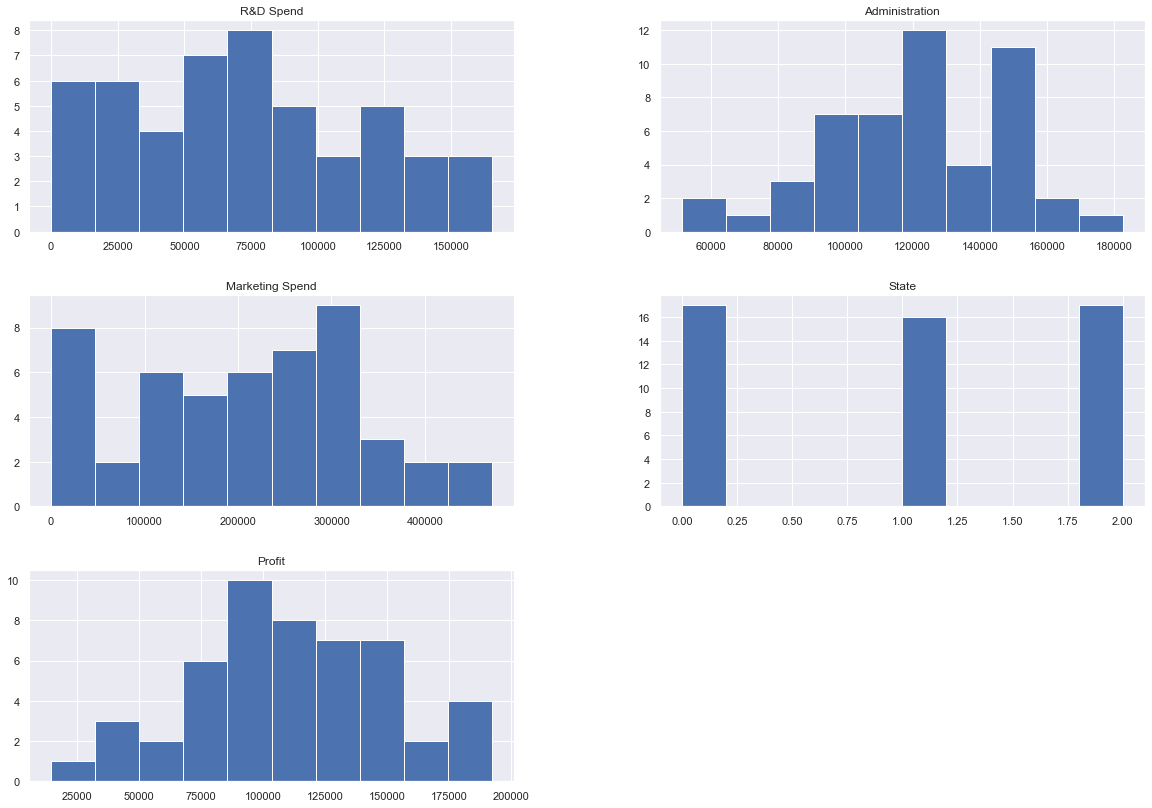

In [160]:
companies_df.hist(figsize=(20,14))
plt.show()

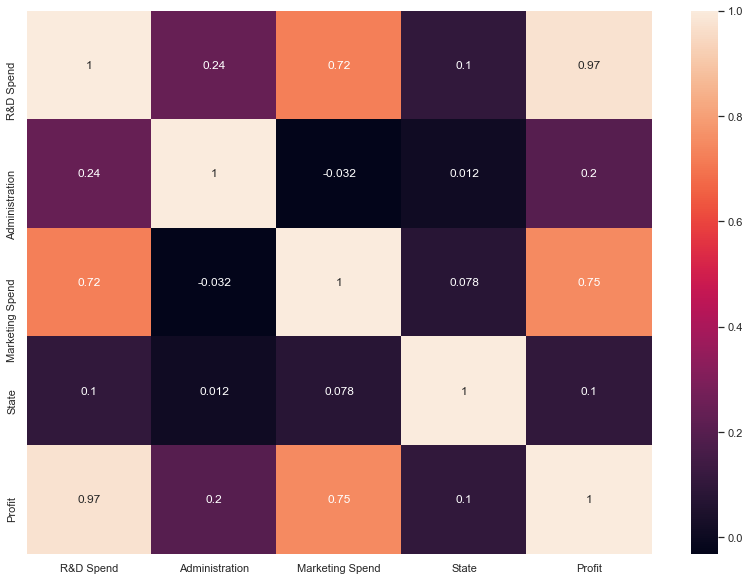

In [162]:
plt.figure(figsize=(14,10))
correlation_matrix = companies_df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

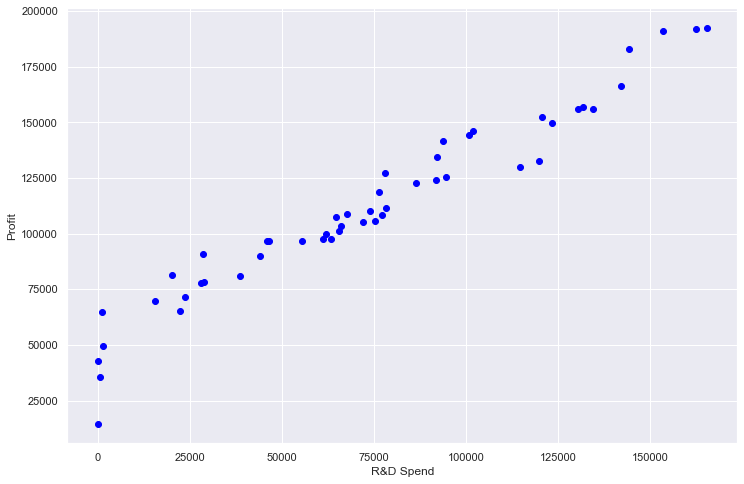

In [164]:
plt.figure(figsize=(12,8))
plt.scatter(companies_df['R&D Spend'], companies_df.Profit,  color='blue')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

In [165]:
msk = np.random.rand(len(companies_df)) < 0.8
train = companies_df[msk]
test = companies_df[~msk]

## Train data distribution

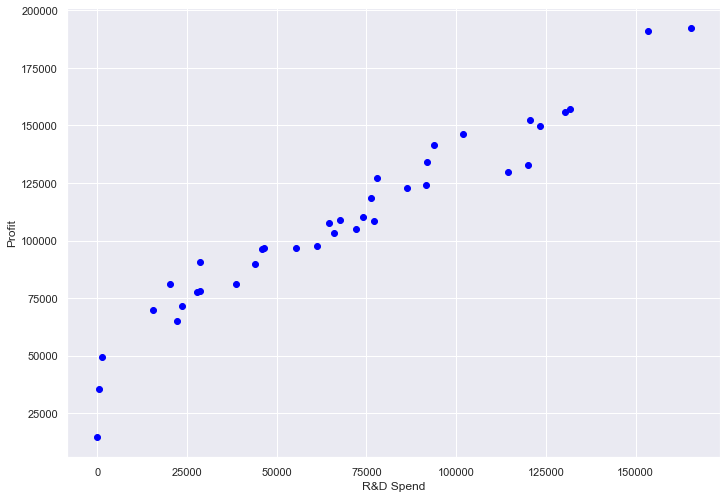

In [170]:
plt.scatter(train['R&D Spend'], train.Profit,  color='blue')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

#### Modeling

Using sklearn package to model data.

In [167]:
from sklearn import linear_model

In [168]:
regr = linear_model.LinearRegression()

In [171]:
train_x = np.asanyarray(train[['R&D Spend']])
train_y = np.asanyarray(train[['Profit']])

In [172]:
regr.fit(train_x,train_y)

LinearRegression()

In [173]:
print('coefficients:',regr.coef_)
print('Intercept:', regr.intercept_)

coefficients: [[0.85581189]]
Intercept: [49164.25453859]


`Coefficient` and `Intercept` in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

## Plot outputs

we can plot the fit line over the data.

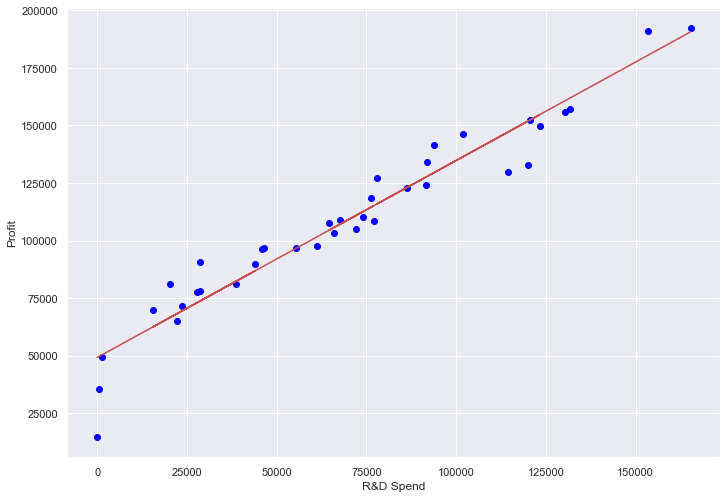

In [177]:
plt.scatter(train['R&D Spend'],train.Profit, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel('R&D Spend')
plt.ylabel("Profit")
plt.show()

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.


In [178]:
from sklearn.metrics import r2_score

In [180]:
test_x = np.asanyarray(test[['R&D Spend']])
test_y = np.asanyarray(test[['Profit']])
test_y_ = regr.predict(test_x)

In [181]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6705.82
Residual sum of squares (MSE): 55398196.92
R2-score: 0.97
